# Compressing images with Discrete Cosine Basis

In [1]:
%matplotlib inline
import numpy as np
import scipy.fftpack
import scipy.misc
import matplotlib.pyplot as plt
plt.gray()

<Figure size 640x480 with 0 Axes>

In [2]:
# Two auxiliary functions that we will use. You do not need to read them (but make sure to run this cell!)

def dct(n):
    return scipy.fftpack.dct(np.eye(n), norm='ortho')

def plot_vector(v, color='k'):
    plt.plot(v,linestyle='', marker='o',color=color)

## 5.3.1 The canonical basis

The vectors of the canonical basis are the columns of the identity matrix in dimension $n$. We plot their coordinates below for $n=8$.

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

 Nothing new so far...


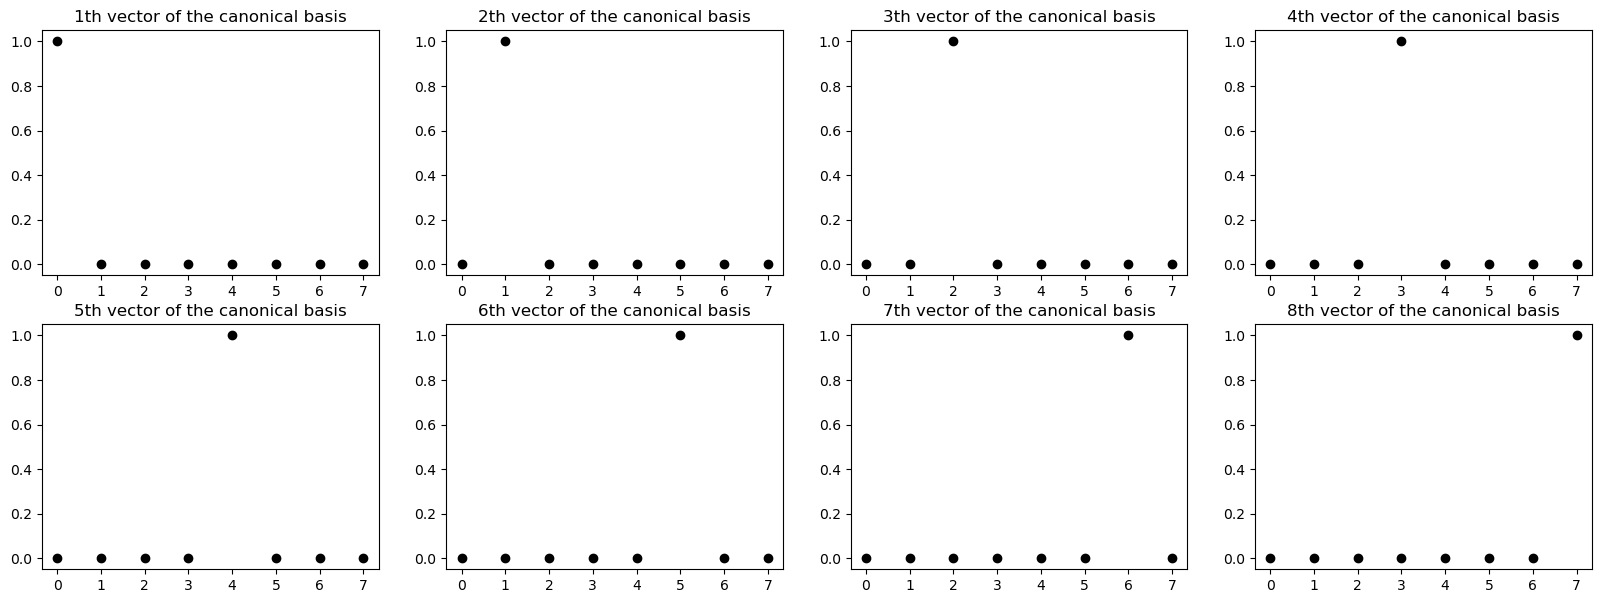

In [3]:
identity = np.identity(8)
print(identity)

plt.figure(figsize=(20,7))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"{i+1}th vector of the canonical basis")
    plot_vector(identity[:,i])
    
print('\n Nothing new so far...')

## 5.3.2 Discrete Cosine basis

The discrete Fourier basis is another basis of $\mathbb{R}^n$. The function `dct(n)` outputs a square matrix of dimension $n$ whose columns are the vectors of the discrete cosine basis.

[[ 0.354  0.49   0.462  0.416  0.354  0.278  0.191  0.098]
 [ 0.354  0.416  0.191 -0.098 -0.354 -0.49  -0.462 -0.278]
 [ 0.354  0.278 -0.191 -0.49  -0.354  0.098  0.462  0.416]
 [ 0.354  0.098 -0.462 -0.278  0.354  0.416 -0.191 -0.49 ]
 [ 0.354 -0.098 -0.462  0.278  0.354 -0.416 -0.191  0.49 ]
 [ 0.354 -0.278 -0.191  0.49  -0.354 -0.098  0.462 -0.416]
 [ 0.354 -0.416  0.191  0.098 -0.354  0.49  -0.462  0.278]
 [ 0.354 -0.49   0.462 -0.416  0.354 -0.278  0.191 -0.098]]


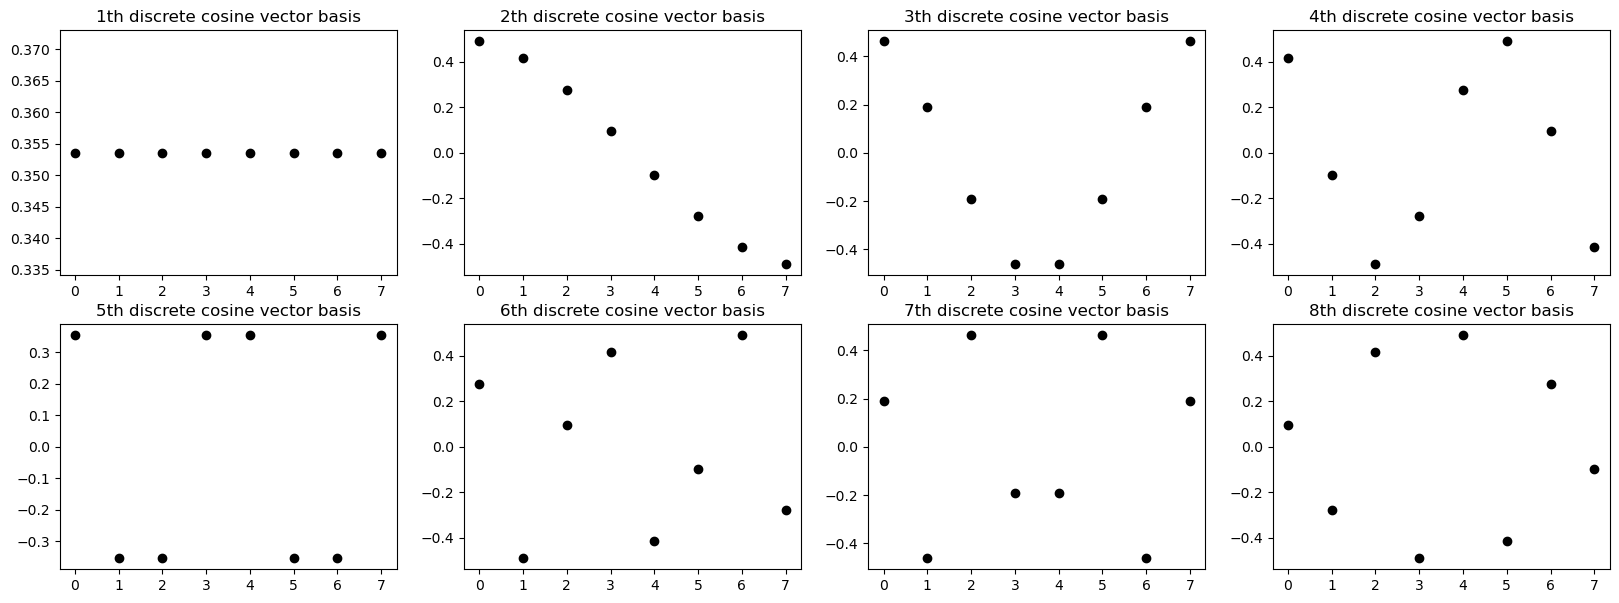

In [4]:
# Discrete Cosine Transform matrix in dimension n = 8
D8 = dct(8)
print(np.round(D8,3))

plt.figure(figsize=(20,7))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(f"{i+1}th discrete cosine vector basis")
    plot_vector(D8[:,i])

**5.3 (a)** Check numerically (in one line of code) that the columns of `D8` are an orthonormal basis of $\mathbb{R}^8$ (ie verify that the Haar wavelet basis is an orthonormal basis).

In [6]:
# Your answer here
np.round(D8@D8.T ,3) # Shows AA^T = I for A = D8 -- Columns of orthogonal matrix are orthonormal

array([[ 1., -0., -0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  1.,  0., -0.,  0.,  0.,  0.,  0.],
       [-0.,  0.,  1., -0.,  0., -0.,  0.,  0.],
       [ 0., -0., -0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -0., -0.,  0.],
       [ 0.,  0., -0.,  0., -0.,  1.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0.,  1., -0.],
       [ 0.,  0.,  0.,  0.,  0., -0., -0.,  1.]])

In [7]:
print(np.linalg.norm(D8, axis=0))
print(np.linalg.norm(D8, axis=1))

[1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1.]


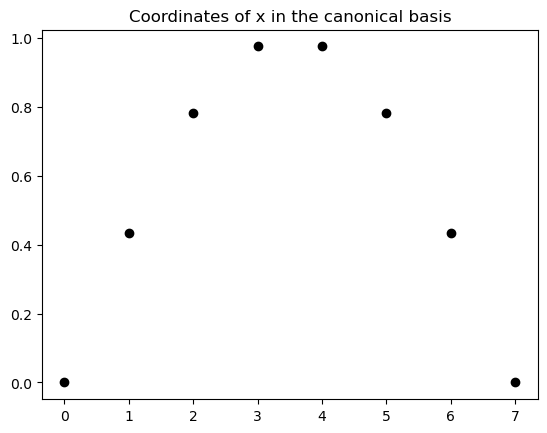

In [8]:
# Let consider the following vector x 
x = np.sin(np.linspace(0,np.pi,8))
plt.title('Coordinates of x in the canonical basis')
plot_vector(x)

**5.3 (b)** Compute the vector $v \in \mathbb{R}^8$ of DCT coefficients of $x$. (1 line of code!), and plot them.

How can we obtain back $x$ from $v$ ? (1 line of code!).

        the original vector x: [0.    0.434 0.782 0.975 0.975 0.782 0.434 0.   ]
  the vector we obtained back: [0.    0.434 0.782 0.975 0.975 0.782 0.434 0.   ]


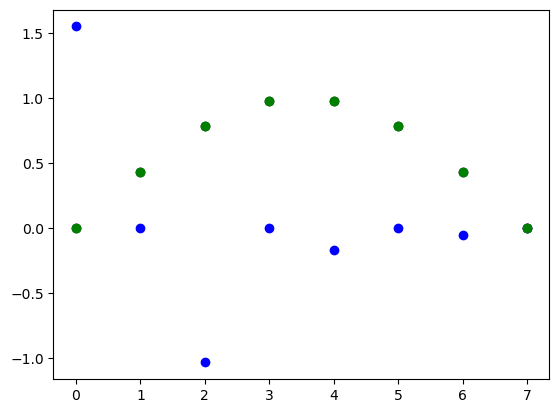

In [15]:
# Write your answer here
v = D8.T@x
plot_vector(v, color='b')

# obtain back x from v
print("the original vector x: {}".format(np.round(x, 3)).rjust(80))
x_prime = D8@v
print("the vector we obtained back: {}".format(np.round(x_prime, 3)).rjust(80))
plot_vector(x)
plot_vector(x_prime, color='g')

## 5.3.3 Image compression
In this section, we will use DCT modes to compress images. Let's use one of the template images of python.

Height: 768, Width: 1024


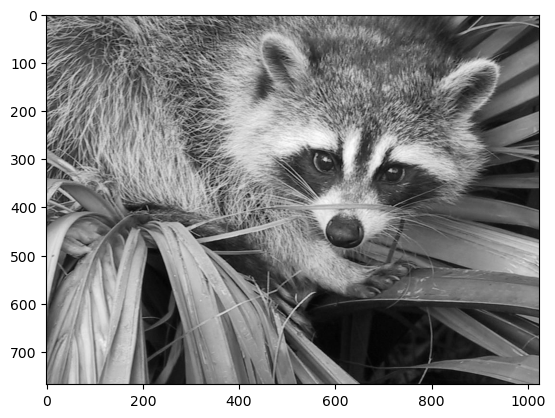

In [16]:
image = scipy.misc.face(gray=True)
h,w = image.shape
print(f'Height: {h}, Width: {w}')

plt.imshow(image)

**5.3 (c)** We will see each column of pixels as a vector in $\mathbb{R}^{768}$, and compute their coordinates in the DCT basis of $\mathbb{R}^{768}$. Plot the entries of `x`, the first column of our image.

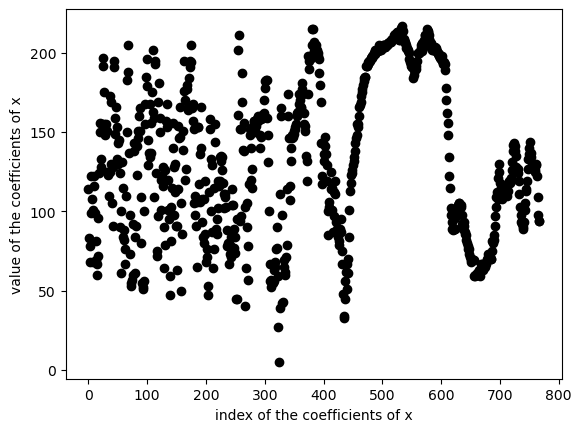

In [19]:
# Your answer here
image = scipy.misc.face(gray=True)
x = image[:,0]
plot_vector(x)
plt.xlabel('index of the coefficients of x')
plt.ylabel('value of the coefficients of x')
plt.show()


**5.3 (d)** Compute the 768 x 1024 matrix `dct_coeffs` whose columns are the dct coefficients of the columns of `image`. Plot an histogram of there intensities using `plt.hist`.

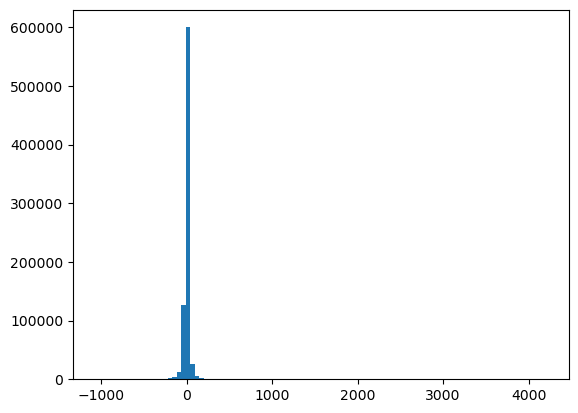

In [21]:
# Your answer here
D768 = dct(768)
dct_coeffs = D768.T@image
plt.hist(dct_coeffs.flatten(), bins = 100);

Since a large fraction of the dct coefficients seems to be negligible, we see that the vector `x` can be well approximated by a linear combination of a small number of discrete cosines vectors.

Hence, we can 'compress' the image by only storing a few dct coefficients of largest magnitude.

Let's say that we want to reduce the size by $98\%$:
Store only the top $2\%$ largest (in absolute value) coefficients of `wavelet_coeffs`.

**5.3 (e)** Compute a matrix `thres_coeffs` who is the matrix `dct_coeffs` where about $97\%$ smallest entries have been put to 0.

In [26]:
# Your answer here
idx = int(dct_coeffs.flatten().shape[0] * 0.02)
thres = np.sort(np.abs(dct_coeffs).flatten())[::-1][idx]
thres

131.69681813896725

In [30]:
thres_coeffs = dct_coeffs.copy()
thres_coeffs = thres_coeffs * (dct_coeffs < thres)
thres_coeffs

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.70009880e+02, -1.47530685e+02, -1.24721250e+02, ...,
        -2.94385049e+02, -2.95073371e+02, -2.94449497e+02],
       [-3.20494713e+02, -3.22259880e+02, -3.22860573e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.23562893e+00,  2.46646493e+00,  2.73527547e+00, ...,
         5.04676170e-01, -6.39302712e-01, -1.30067209e+00],
       [ 6.04416872e-01,  3.95835651e-01, -1.56126486e+00, ...,
        -8.26403414e-01, -1.40428402e+00, -2.47817407e+00],
       [-5.93421784e-01, -4.95068092e-01, -1.30208160e+00, ...,
        -9.54782266e-01, -4.25602612e-01,  2.08322852e-01]])

**5.3 (f)** Compute and plot the `compressed_image` corresponding to `thres_coeffs`.

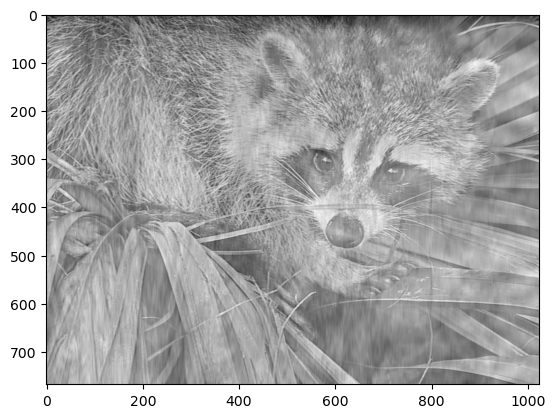

In [32]:
compressed_image = D768 @ thres_coeffs
plt.imshow(compressed_image)